This notebook is made to represent a new and improved shadow modelling, which can also be used to model the sahdow reciprocaly cast by one jupiter satellite on another

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#point on the surface of 
,he earth 
x_e = np.array([0,0,0.9])#north pole taken to be the point on the earth's surface
b = 0.9 # polar radius
a = 1 #equatorial radius
A = np.array([[1/a**2, 0, 0],[0,1/a**2,0],[0,0,1/b**2]])

print(x_e.T @ A @ x_e) #the result of this equaton should be one

1.0


In [3]:
x_s = np.array([-1000,0,10]) #  point on the surface of the sun, with offset counted in earth's radii
#the sun is 10 times bigger than earth
r_s = np.array([-1000,0,0]) # sun's center of mass offset from earth
R_s = 10 #sun radius
print((x_s-r_s).T@(x_s-r_s)) # sould return the sun's radius, squared

100


In [4]:
#position of the satellite 

r = np.array([15,10,5]) #position of the satellite in the ECEF frame #15
n = (r - r_s) / np.linalg.norm(r - r_s) # unit vector along ISF axis z
u = (r -(n*r)*n)/np.linalg.norm(r-(n*r)*n) # u does not exist if the earth is between the satellite and the sun
v = np.cross(n, u)

#coordinates of the origin point
gamma = 0.5

o = r - gamma*n #origin of the ISF system

PEC = np.linalg.norm(o)*u;

PEC_isf = np.array([np.dot(u, PEC),
                    np.dot(v, PEC),
                    np.dot(n, PEC)]).T

print(n)
print(v)
print(u)
print(o)

#section concerning the existance of the image plane was skipped for now...

[0.99993934 0.00985162 0.00492581]
[ 3.20726556e-07 -4.47211702e-01  8.94358297e-01]
[1.62778602e-04 8.94414156e-01 4.47239634e-01]
[14.50003033  9.99507419  4.9975371 ]


In [5]:
M = A@r@(r.T)*A.T - (r.T@A@r - 1)*A

print(M)

[[1.        0.        0.       ]
 [0.        1.        0.       ]
 [0.        0.        1.2345679]]


In [6]:
k_0 = u.T@M@u
print(k_0)
k_1 = u.T@M@v
print(k_1)
k_2 = v.T@M@v 
print(k_2)
k_3 = -2*gamma*u.T@M@n
print(k_3)
k_4 = -2*gamma*v.T@M@n
print(k_4)
k_5 = gamma**2*n.T@M@n
print(k_5)

1.046919043377021
0.09382539592222433
1.1875004835100529
-0.011693970715755137
-0.0010333744963708386
0.2500014228654173


In [7]:
delta = np.array([k_3, k_4]).T
B = np.array([[k_0, k_1],[k_2, k_3]])

In [8]:
print(np.linalg.norm(B))

print(B) #if B>0 then we do have a parabula

1.5859182941101124
[[ 1.04691904  0.0938254 ]
 [ 1.18750048 -0.01169397]]


In [9]:
Eigenvalues, Q = np.linalg.eig(B) #this step fails

print(Eigenvalues)

lambda_1 = Eigenvalues[0]
lambda_2 = Eigenvalues[1]

D = np.diag(Eigenvalues)

print(D)

Q@D@np.linalg.inv(Q)

[ 1.14337853 -0.10815346]
[[ 1.14337853  0.        ]
 [ 0.         -0.10815346]]


array([[ 1.04691904,  0.0938254 ],
       [ 1.18750048, -0.01169397]])

In [10]:
print(B)

print(Q)

print(np.size(Q))

[[ 1.04691904  0.0938254 ]
 [ 1.18750048 -0.01169397]]
[[ 0.69725158 -0.08096235]
 [ 0.7168265   0.99671716]]
4


In [11]:
alpha = 0#np.array(np.linspace(-1000, 1000, 10**6))
beta  = 0#np.array(np.linspace(-1000, 1000, 10**6))
Chsi  = np.array((alpha, beta)).T

Chsi.reshape([2,1])

print(Chsi)
np.shape(Chsi)

[0 0]


(2,)

[-0.00388952  0.00038469]


/home/vserra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


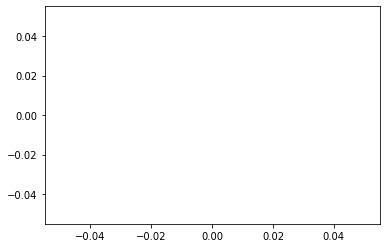

In [12]:
#projection of the earth

phi = Q.T@Chsi + 0.5*np.linalg.inv(D)@Q.T@delta

print(phi)

#get the poits on the ellipse
alpha = np.array(np.linspace(-1000, 0, 10**6))


beta = np.sqrt(-alpha*(alpha*k_0+k_3)/k_2 -k_5/k_2)

plt.scatter(alpha, beta)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.color'] = 'k'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['k'])

x = np.linspace(-1, 1, 10**4)
y = np.linspace(-1, 1, 10**4)
x, y = np.meshgrid(x, y)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    
    

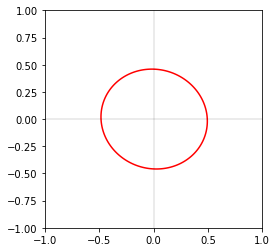

In [14]:
axes()
plt.contour(x, y,(k_0*x**2 + k_1*x*y + k_2*y**2 + k_3*x + k_4*y + k_5), [gamma], colors='r')
plt.gca().set_aspect("equal")
plt.show()

In [15]:
# Sun's projection

R_0 = (gamma*R_s)/np.linalg.norm(r-r_s)

print(R_0)

0.00492580955251607


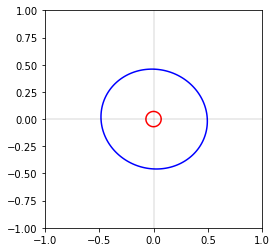

In [16]:
axes()
plt.contour(x, y,(x**2 + y**2 ), [R_0], colors='r')
plt.contour(x, y,(k_0*x**2 + k_1*x*y + k_2*y**2 + k_3*x + k_4*y + k_5), [gamma], colors='b')

plt.gca().set_aspect("equal")
plt.show()

In [17]:
Omega = (k_2*k_3**2 -2*k_1*k_3*k_4+ k_0*k_4**2)/(4*(k_0*k_2-k_1**2))


r1 = [lambda_1 - k_2, k_1]
r2 = [lambda_2 - k_2, k_1]
print(r1)

r1 = r1/np.linalg.norm(r1)
r2 = r1/np.linalg.norm(r2)
print(r1)

#computer transaltion parameters 

t_x = np.dot(r1,np.array([k_3, k_4]))/lambda_1
t_y = np.dot(r2,np.array([k_3, k_4]))/lambda_2

print(t_x)
print(t_y)

#semi major and semi minor axes
semi_major_squared = (Omega - k_5) / lambda_1
semi_minor_squared = (Omega - k_5) / lambda_2

A = lambda_1*(R_0 - 0.5*t_x )**2 + 0.25*lambda_2*t_y*t_y - Omega + k_5;
B = 2.0*lambda_2*R_0*t_y;
C = lambda_1*(0.5*t_x*t_x - 2*R_0*R_0) + lambda_2*(0.5*t_y*t_y + 4*R_0*R_0) - 2*Omega + 2*k_5;
D = 2*lambda_2*R_0*t_y;
E = lambda_1*(R_0+0.5*t_x)*(R_0+0.5*t_x) + 0.25*lambda_2*t_y*t_y - Omega + k_5;

coeff =  np.array([A,B,C,D,E])

print(coeff)

solutions = np.roots(coeff)
XX = solutions

[-0.044121951439149765, 0.09382539592222433]
[-0.42555085  0.90493451]
0.003534475052227864
-0.028764032635920016
[2.49957804e-01 3.06476938e-05 4.99833954e-01 3.06476938e-05
 2.49997617e-01]


In [18]:
#calculating the overlapping area

#condition : is the sun's center inside the projection of the earth ? 


#since the projection of the earth must be an ellipse, the following check should be <= 1 if the 
sun_center_pos_earth = Omega/(Omega-k_5)

print('Posizione del centro del sole rispetto alla proiezione della terra : '+ str(sun_center_pos_earth))

Posizione del centro del sole rispetto alla proiezione della terra : -0.00013063687061269132


In [19]:
#oringin of the sun in the transformed frame of reference

O_s = 0.5*np.array([t_x, t_y]);

#calculate the coordinates of the intersections betweent the circle and the conical curve in transformed frame
#in the new frame, the origin is at the centre of the projection of the Earth
Q1 = np.array((1.0 - XX[0]*XX[0])/(1.0 + XX[0]*XX[0])*R_0 + 0.5*t_x , 2*XX[0]/(1.0 + XX[0]*XX[0])*R_0 + 0.5*t_y)
Q2 = np.array((1.0 - XX[1]*XX[1])/(1.0 + XX[1]*XX[1])*R_0 + 0.5*t_x , 2*XX[1]/(1.0 + XX[1]*XX[1])*R_0 + 0.5*t_y)

In [20]:
PEC_new = np.array([np.dot(PEC_isf[:2], r1)+0.5*t_x,np.dot(PEC_isf[:2], r2)+0.5*t_y])

In [21]:
#figure out the intersection between the line from PEC_new to Os and the conical curve.
#parameter equation of line from Oe to Os in transformed frame, x = td
PEC_Os_len = np.sqrt( (O_s[0]-PEC_new[0])*(O_s[0]-PEC_new[0]) + (O_s[1]-PEC_new[1])*(O_s[1]-PEC_new[1]));
d = np.array([(O_s[0]-PEC_new[0])/PEC_Os_len,(O_s[1]-PEC_new[1])/PEC_Os_len])
aa = lambda_1*d[0]*d[0] + lambda_2*d[1]*d[1];
bb = 2*(lambda_1*PEC_new[0]*d[0] + lambda_2*PEC_new[1]*d[1]);
cc = lambda_1*PEC_new[0]*PEC_new[0] + lambda_2*PEC_new[1]*PEC_new[1] + k_5 - Omega;
t1 = (-bb + np.lib.scimath.sqrt(bb*bb - 4.0*aa*cc ))/aa/2.0;
t2 = (-bb - np.lib.scimath.sqrt(bb*bb - 4.0*aa*cc ))/aa/2.0;


print(aa)
print(bb)
print(cc)


print(t1)
print(t2)

0.6776960814904248
-13.320074710098368
65.70125222530088
(9.827469181173484+0.6072964181190792j)
(9.827469181173484-0.6072964181190792j)


In [25]:
if(t1*t2<0.0):
        
    if(t1 > 0):
        dis_circle = t1
    else:
        dis_circle = t2
        
else:
        
    if(t1<=t2):
        dis_circle = t1
    else:
        dis_circle = t2
        